# Predicting Customer Churn

## Table of Contents
<ul>
<li><a href="#intro">Introduction</a></li>
<li><a href="#wrangling">Data Wrangling</a></li>
<li><a href="#datacleaning">Data Cleaning</a>  </li>  
<li><a href="#eda">Exploratory Data Analysis</a></li>
<li><a href="#model">Logistic Regression</a></li>
<li><a href="#conclusions">Conclusions</a></li>
</ul>

<a id='intro'></a><H1>Introduction</H1>

 <font size='4'>In this project we are going to predict if a customer churns or not using a telecom company's dataset available on Kaggle.

 Customer churn is when a company’s customers stop doing business with that company. Businesses are very keen on measuring churn because keeping an existing customer is far less expensive than acquiring a new customer. New business involves working leads through a sales funnel, using marketing and sales budgets to gain additional customers. Existing customers will often have a higher volume of service consumption and can generate additional customer referrals.
 
<br> <b>Tools Used:</b>
<ul>Python</ul>
<ul>Pandas</ul>
<ul>scikit learn




<a id='wrangling'></a>
## Data Wrangling

In [49]:
#Import dataset and read file
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

#Read the data
df=pd.read_csv('WA_Fn-UseC_-Telco-Customer-Churn.csv')
df.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [2]:
#Get number of rows and columns
df.shape

(7043, 21)

In [3]:
#get info on the variable names and missing values
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
customerID          7043 non-null object
gender              7043 non-null object
SeniorCitizen       7043 non-null int64
Partner             7043 non-null object
Dependents          7043 non-null object
tenure              7043 non-null int64
PhoneService        7043 non-null object
MultipleLines       7043 non-null object
InternetService     7043 non-null object
OnlineSecurity      7043 non-null object
OnlineBackup        7043 non-null object
DeviceProtection    7043 non-null object
TechSupport         7043 non-null object
StreamingTV         7043 non-null object
StreamingMovies     7043 non-null object
Contract            7043 non-null object
PaperlessBilling    7043 non-null object
PaymentMethod       7043 non-null object
MonthlyCharges      7043 non-null float64
TotalCharges        7043 non-null object
Churn               7043 non-null object
dtypes: float64(1), int64(2), obj

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x000001D5DE0BA630>,
      dtype=object)

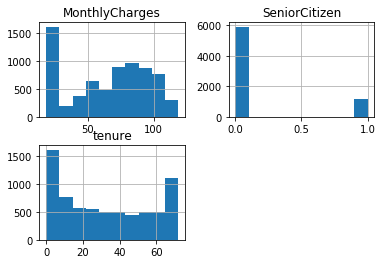

In [4]:
#Get a histogram for all numeric variables
df.hist()

In [5]:
#Check the datatype of Churn
type(df['Churn'][0])

str

Text(0.5, 1.0, 'Percentage of Churn data')

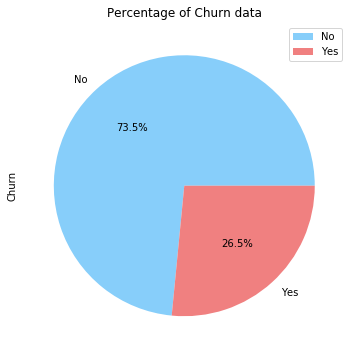

In [6]:
#Visualize churn data
df['Churn'].value_counts().plot.pie(figsize=(6,6),autopct='%1.1f%%',colors=['lightskyblue','lightcoral'],legend=True)
plt.title('Percentage of Churn data')

In [7]:
# Check the different types of contracts available
df['Contract'].value_counts()

Month-to-month    3875
Two year          1695
One year          1473
Name: Contract, dtype: int64

Text(0.5, 1.0, 'Count of Tenure in months')

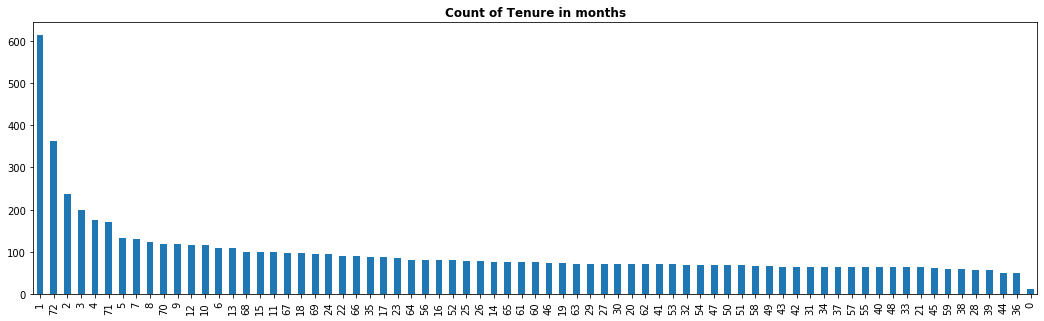

In [8]:
#Plot the graph
f, ax = plt.subplots(figsize=(18,5))
df['tenure'].value_counts().plot(kind='bar')
plt.title('Count of Tenure in months', weight='bold')

<b>Preliminary Observations:</b>
   
    1. No missing records found in the dataset and there are around 7043 records with 21 columns
    2. Monthly charges, Senior Citizen and Tenure are the only numerical variables but seems  like there are many more numerical varibles that haven't been beein stored as numeric.
    3. Under Tenure variable, 1 month seems to be the most opted choice for subscription followed by 72 months
    4. Month to month contract is the most preferred mode  of subscription
    5. Around 26.5% of people unsubscribe. We are yet to check the underlying causes. 
    

<a id='datacleaning'></a>
## Data Cleaning

In [9]:
#Convert Churn variables from strings to int for easier calculation in later stages
df['Churn'].replace({'No':0,'Yes':1},inplace=True)

In [10]:
#Drop unwanted columns
df.drop(['customerID'],axis=1,inplace=True)

In [11]:
#Check for null values
df.isnull().count()

gender              7043
SeniorCitizen       7043
Partner             7043
Dependents          7043
tenure              7043
PhoneService        7043
MultipleLines       7043
InternetService     7043
OnlineSecurity      7043
OnlineBackup        7043
DeviceProtection    7043
TechSupport         7043
StreamingTV         7043
StreamingMovies     7043
Contract            7043
PaperlessBilling    7043
PaymentMethod       7043
MonthlyCharges      7043
TotalCharges        7043
Churn               7043
dtype: int64

In [12]:
#Check the datatypes of totalcharges
type(df['TotalCharges'][0])

str

In [13]:
#Converting totalcharges to numeric
df['TotalCharges']=pd.to_numeric(df['TotalCharges'],errors='coerce')

In [14]:
#Confirming changes
type(df['TotalCharges'][0])

numpy.float64

In [15]:
#Check for null again
df['TotalCharges'].isnull().value_counts()

False    7032
True       11
Name: TotalCharges, dtype: int64

In [16]:
#Checking for missing value rows
df[df.isnull().any(axis=1)]


,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
488,Female,0,Yes,Yes,0,No,No phone service,DSL,Yes,No,Yes,Yes,Yes,No,Two year,Yes,Bank transfer (automatic),52.55,NaN,0
753,Male,0,No,Yes,0,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,20.25,NaN,0
936,Female,0,Yes,Yes,0,Yes,No,DSL,Yes,Yes,Yes,No,Yes,Yes,Two year,No,Mailed check,80.85,NaN,0
1082,Male,0,Yes,Yes,0,Yes,Yes,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,25.75,NaN,0
1340,Female,0,Yes,Yes,0,No,No phone service,DSL,Yes,Yes,Yes,Yes,Yes,No,Two year,No,Credit card (automatic),56.05,NaN,0
3331,Male,0,Yes,Yes,0,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,19.85,NaN,0
3826,Male,0,Yes,Yes,0,Yes,Yes,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,25.35,NaN,0
4380,Female,0,Yes,Yes,0,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,20.00,NaN,0
5218,Male,0,Yes,Yes,0,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,One year,Yes,Mailed check,19.70,NaN,0
6670,Female,0,Yes,Yes,0,Yes,Yes,DSL,No,Yes,Yes,Yes,Yes,No,Two year,No,Mailed check,73.35,NaN,0


In [17]:
#Removing missing value rows
df.dropna(inplace=True)

In [18]:
#Confirming changes by checking its dimensions
df.shape

(7032, 20)

In [19]:
#Convert Categorical variables into numerical avriables by using pd.getdummies()
df_new=pd.get_dummies(df)
df_new.head()

,SeniorCitizen,tenure,MonthlyCharges,TotalCharges,Churn,gender_Female,gender_Male,Partner_No,Partner_Yes,Dependents_No,...,StreamingMovies_Yes,Contract_Month-to-month,Contract_One year,Contract_Two year,PaperlessBilling_No,PaperlessBilling_Yes,PaymentMethod_Bank transfer (automatic),PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check
0,0,1,29.85,29.85,0,1,0,0,1,1,...,0,1,0,0,0,1,0,0,1,0
1,0,34,56.95,1889.50,0,0,1,1,0,1,...,0,0,1,0,1,0,0,0,0,1
2,0,2,53.85,108.15,1,0,1,1,0,1,...,0,1,0,0,0,1,0,0,0,1
3,0,45,42.30,1840.75,0,0,1,1,0,1,...,0,0,1,0,1,0,1,0,0,0
4,0,2,70.70,151.65,1,1,0,1,0,1,...,0,1,0,0,0,1,0,0,1,0


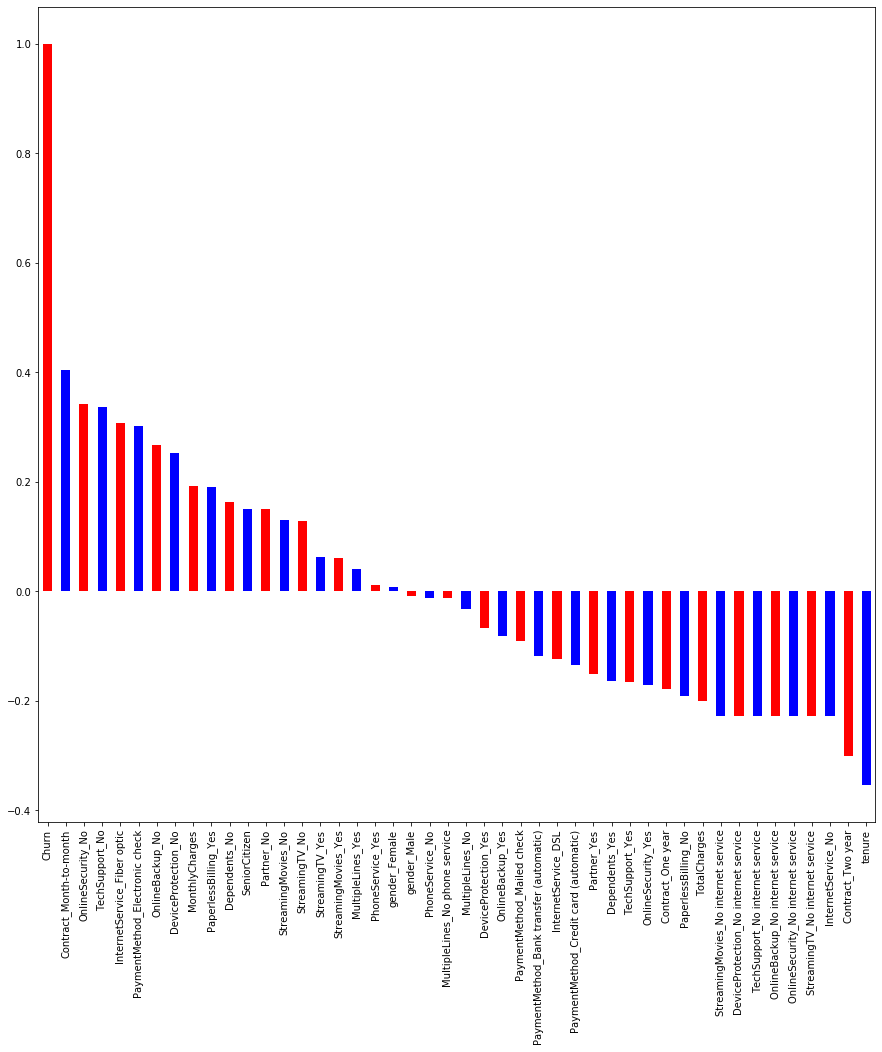

In [20]:
#Check the correlation between Churn and other variables
fig, ax = plt.subplots(figsize = (15,15))
color_palette_list = [ 'Red', 'yellow', 'green']
df_new.corr()['Churn'].sort_values(ascending = False).plot(kind='bar',color=['red','blue'])


Contract_Month_to_month,No_online_security,NoTechSupport have positive correlation with respect to churn whereas tenure,Contract-twoyears,No_internet_service have a negative correlation.

<a id='eda'></a>
## Exploratory Data Analysis

In [21]:
#Masked dataframes 
df_churn =df_new[df_new['Churn']==1]
df_no_churn=df_new[df_new['Churn']==0]

In [22]:
df_no_churn.head()

,SeniorCitizen,tenure,MonthlyCharges,TotalCharges,Churn,gender_Female,gender_Male,Partner_No,Partner_Yes,Dependents_No,...,StreamingMovies_Yes,Contract_Month-to-month,Contract_One year,Contract_Two year,PaperlessBilling_No,PaperlessBilling_Yes,PaymentMethod_Bank transfer (automatic),PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check
0,0,1,29.85,29.85,0,1,0,0,1,1,...,0,1,0,0,0,1,0,0,1,0
1,0,34,56.95,1889.50,0,0,1,1,0,1,...,0,0,1,0,1,0,0,0,0,1
3,0,45,42.30,1840.75,0,0,1,1,0,1,...,0,0,1,0,1,0,1,0,0,0
6,0,22,89.10,1949.40,0,0,1,1,0,0,...,0,1,0,0,0,1,0,1,0,0
7,0,10,29.75,301.90,0,1,0,1,0,1,...,0,1,0,0,1,0,0,0,0,1


# Check count% of Gender in the dataset

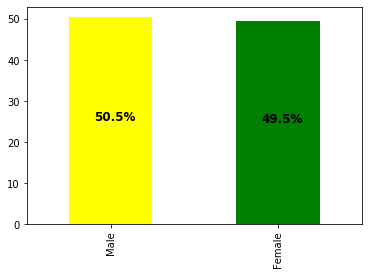

In [23]:
#visualizing Gender and churn
ax=df['gender'].value_counts().transform(lambda x:x/x.sum()*100).plot(kind='bar',color=['yellow','green'])


# create a list to collect the plt.patches data
totals = []

# find the values and append to list
for i in ax.patches:
    totals.append(i.get_width())

# set individual bar lables using above list
total = sum(totals)

for i in ax.patches:
    # get_width pulls left or right; get_y pushes up or down
    ax.text(i.get_x()+.15, i.get_height()/2, \
            str(round((i.get_height()/total), 1))+'%',
            fontsize=12,color='black',
           weight = 'bold')


# Check relationship between Seniorcitizens and Churn rate

In [24]:
#Find total number of senior citizens in the dataset
df['SeniorCitizen'].value_counts().transform(lambda x:x/x.sum()*100)

0    83.759954
1    16.240046
Name: SeniorCitizen, dtype: float64

Text(0.5, 1.0, 'Senior Citizens who churn in %')

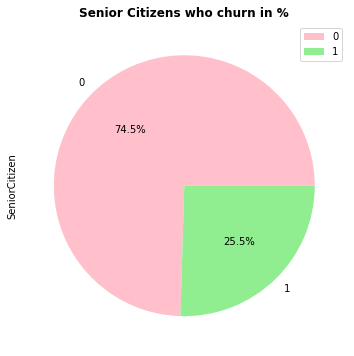

In [25]:
#Find the percentage of senior citizens who churned in the dataset
df_churn['SeniorCitizen'].value_counts().transform(lambda x:x/x.sum()*100).plot.pie(figsize=(6,6),autopct='%1.1f%%',colors=['pink','lightgreen'],legend=True)
plt.title('Senior Citizens who churn in %',weight='bold')
                            

 About 16% of people in the dataset are senior citizens of which 25.5% churn.

<Figure size 432x288 with 0 Axes>

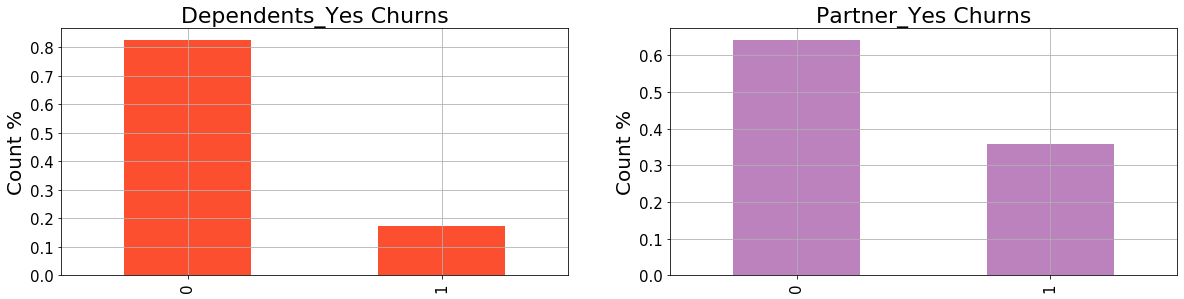

In [26]:
plt.figure(1)
plt.figure(figsize = (15,10))
dp = ['Dependents_Yes','Partner_Yes']
colour = ['#fc4f30','#bc82bd']
i = 0
for col in dp:    
    plt.subplot(int(str(22)+str((dp.index(col)+1))))
    ax=df_churn[col].value_counts(normalize=True).plot.bar(figsize=(20,10), fontsize = 15.0, color = colour[i])
    plt.title(col+' '+'Churns', fontsize = 22.0)
    plt.ylabel('Count %', fontsize = 20.0)
    i=i+1
    ax.grid()   

From the above graphs we observe that,
<br>1.Around 82% of people who do not have any dependents churn. 
<br>2.Around 65% of people who do not have a partner churn.


# Compare churns with Tenure

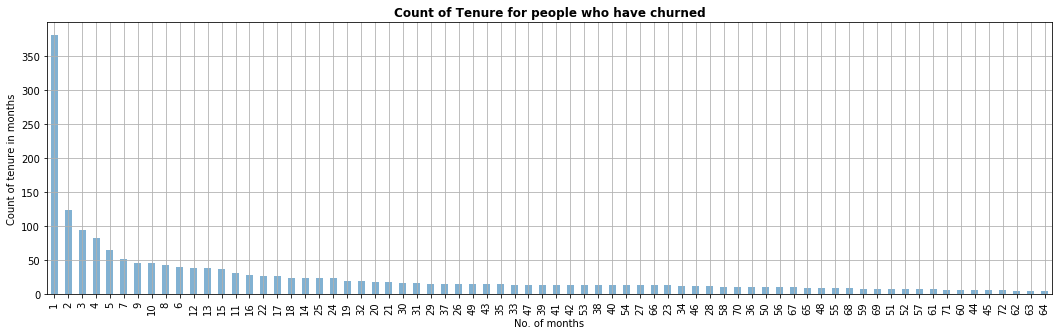

In [27]:
#Compare churns and Tenure 
f, ax = plt.subplots(figsize=(18,5))
df_churn['tenure'].value_counts().plot(kind='bar',color=['#81b1d2'])
plt.title('Count of Tenure for people who have churned',weight='bold')
ax.set_xlabel('No. of months')
ax.set_ylabel('Count of tenure in months')
ax.grid()

Looks like majority of people having a tenure of just 1 month churn with a count of approximately 375.It is observed that, as the tenure increases, loyalty increases and churn amount decreases.

# Exploring Contract tenure in months


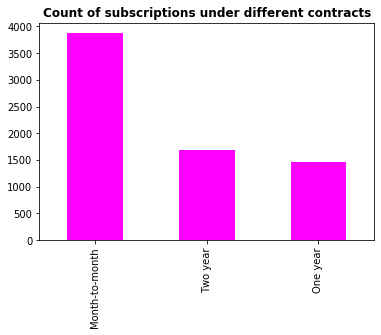

In [28]:
df['Contract'].value_counts().plot(kind='bar',color=['magenta'])
plt.title('Count of subscriptions under different contracts',weight='bold')
ax.set_xlabel(' contracts')
ax.set_ylabel('Count of contracts')
ax.grid()

Text(0.5, 1.0, 'Contract Month to month who churn in %')

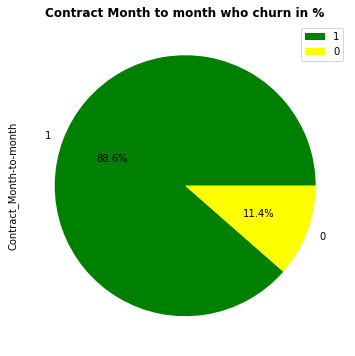

In [29]:
#Check % of people who churn under month to month contract
df_churn['Contract_Month-to-month'].value_counts().transform(lambda x:x/x.sum()*100).plot.pie(figsize=(6,6),autopct='%1.1f%%',colors=['green','yellow'],legend=True)
plt.title('Contract Month to month who churn in %',weight='bold')
                            

As we see from the above two graphs, Month to Month contracts have the highest people unsubscribing.
Drilling a little deeper, we check the percentage of people who churned under Month to month contract .A Whopping 89% of people unsubscribe under this contract. Comparitively less number of people under Two year and One year contracts churn.

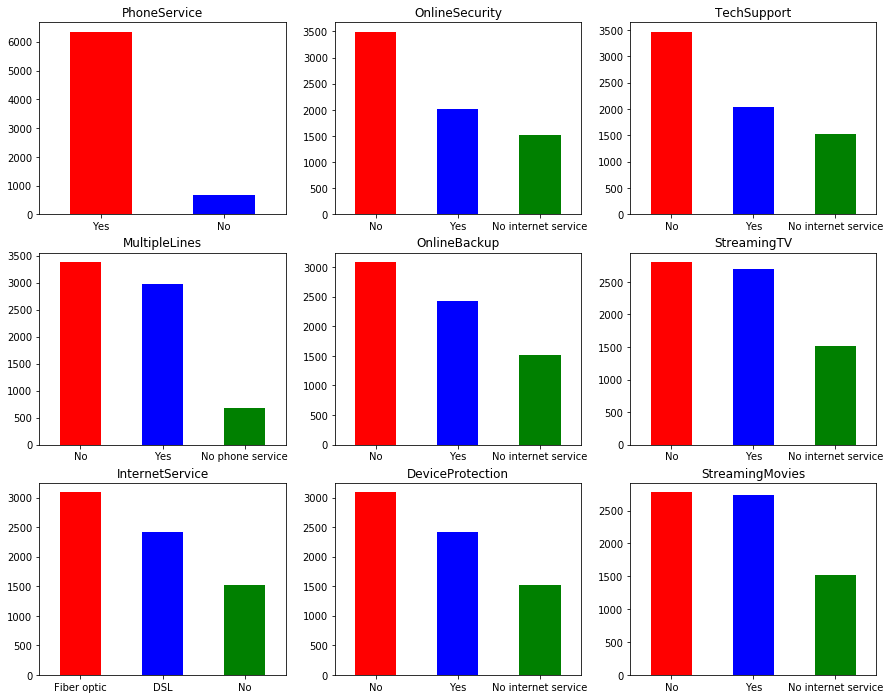

In [30]:
services = ['PhoneService','MultipleLines','InternetService','OnlineSecurity',
           'OnlineBackup','DeviceProtection','TechSupport','StreamingTV','StreamingMovies']

fig, axes = plt.subplots(nrows = 3,ncols = 3,figsize = (15,12))
for i, item in enumerate(services):
    if i < 3:
        ax = df[item].value_counts().plot(kind = 'bar',ax=axes[i,0],rot = 0,color=['red','blue','green'])
        
    elif i >=3 and i < 6:
        ax = df[item].value_counts().plot(kind = 'bar',ax=axes[i-3,1],rot = 0,color=['red','blue','green'])
        
    elif i < 9:
        ax = df[item].value_counts().plot(kind = 'bar',ax=axes[i-6,2],rot = 0,color=['red','blue','green'])
    ax.set_title(item)

# Relationship between Monthly and TotalCharges

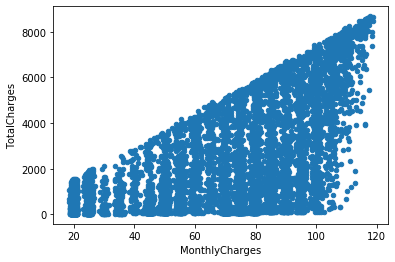

In [31]:
#Check relationship between monthly and Total charges. They should be multicollinear in general , but let us have a look
df[['MonthlyCharges', 'TotalCharges']].plot.scatter(x = 'MonthlyCharges', y='TotalCharges')


As expected the Total charges will increase with monthlycharges. A positive correlation (multicollinearity) is observed.
For generating a model,  high correlation between independent variables will lead to unstable parameter estimates which will make it difficult to assess the effect of independent variables on dependent variable.


# Splitting Dataset 

First we need to train our model, next we need to test it. We are going to use our df_new dataset which consists of all numerical variables(dummy).Since now we have only one dataset, we split it.X is data with independent variables and Y is data with dependent variable. We will go for the most common split of 80/20 (80-Training, 20-Testing)



In [35]:
Y = df_new["Churn"].values
X = df_new.drop(labels = ["Churn"],axis = 1)

#Create train and test data
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.2, random_state=101)

<a id='model'></a>
# Logistic Regression

We will go for Logistic Regression as the dependent variable is categorical in nature. (i.e Churn is 0 and 1). The independent variables can be both continuous and categorical.


In [38]:
#Train the model and store the result in a variable
from sklearn.linear_model import LogisticRegression
model = LogisticRegression()
result = model.fit(X_train, y_train)

Now using the trained model,  we can predict if a customer churned or not for test dataset.

In [39]:
from sklearn import metrics
prediction_test = model.predict(X_test)
# Print the prediction accuracy
print (metrics.accuracy_score(y_test, prediction_test))

0.8102345415778252


We got an accuracy score of 81% which means <b> 81% </b>of the times, our model predicted the right outcome for our binary classification problem.

Our main objective is to reduce churn and take the right preventive measures on time , we will go for feature selection i.e select the most important features which effect the churn rate.Hence, we set our coefficients to zero and look at the weights of each variable.

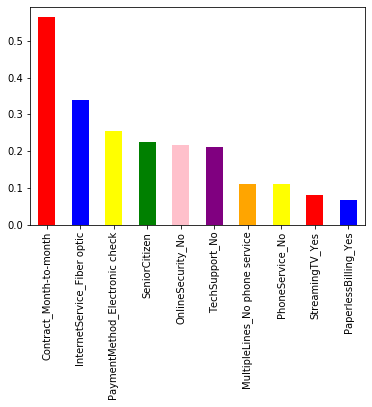

In [48]:
#get weights of all independent variables(X variables)- Postive correlation
weights = pd.Series(model.coef_[0],index=X.columns.values)
weights.sort_values(ascending = False)[:10].plot(kind='bar',color=['red','blue','yellow','green','pink','purple','orange','yellow'])

We see that Contract month-to-month has the highest coefficient and is positive meaning,having this type of contract increases the chances of a customer to churn.
IT is follwed by Internetservice_Fiber optics which doesn't make much sense as the faster the internet, a customer would wish to stay but here it says vice versa. We need to have more information regarding this variable.

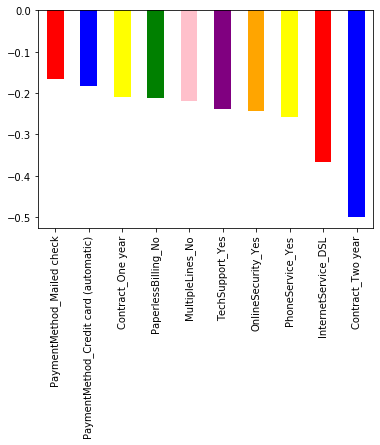

In [47]:
#Negative correlation for independent variables check
weights.sort_values(ascending = False)[-10:].plot(kind='bar',color=['red','blue','yellow','green','pink','purple','orange','yellow'])

Contract two year has the highest negative correlation coefficient which means customers with this plan tend to be loyal to the company and wouldn't easily churn.

<a id='conclusion'></a>
# Conclusion


1. From the Logistic regression model, we found that 81% of the times, our  model predicts the right outcome for customers who churned and who didn't.
2. From the feature selection, we found that customes under Month to month contracts tend to churn the highest. So better preventive measures to be taken in time to retain those customers under this contract.
3. On the contrary, Contract_two_year tend to be most loyal customers so there isn't any need to worry about them.
4. Also, one interesting point to be noted is that fiber optics have a high correlation coefficient with respect to churn which is a bit odd because people prefer faster internet but according to our model, they still churn. Further investigation is required regarding this variable.